In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

In [5]:
images_path = glob.glob('part 1 dataset\*')

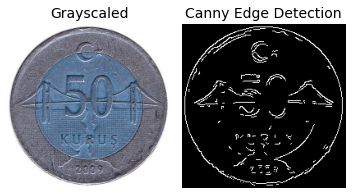

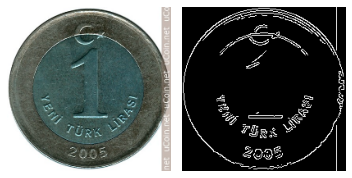

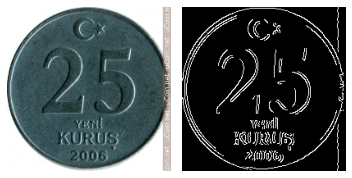

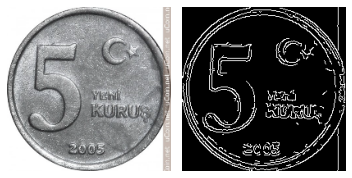

In [6]:
images_path = glob.glob('part 1 dataset\*')

edge_images, normal_images = [],[]

for i in images_path:

    img = cv2.imread(i)
    img = cv2.resize(img,(200,200), interpolation= cv2.INTER_LINEAR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
    edges = cv2.Canny(image=img_blur, threshold1=150, threshold2=200)
    normal_images.append(img)
    edge_images.append(edges)
    
normal_images = np.array(normal_images)
canny_images = np.array(edge_images)

#----------------------------------------------

for i in range(4):
    
    fig, axes = plt.subplots(ncols=2, figsize=(5,5))
    
    if i == 0:
        
        axes[0].set_title('Grayscaled', fontsize=14)
        axes[1].set_title('Canny Edge Detection', fontsize=14)

    axes[0].imshow(normal_images[i],cmap='gray')
    axes[1].imshow(canny_images[i], cmap='gray')
    
    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def my_hough_circles(image,minR,maxR,no_votes):
    max_y, max_x = image.shape
    theta_vec = np.deg2rad(np.arange(0, 360, 1))
    H = np.zeros((max_x+1,max_y+1, maxR-minR+1),dtype=np.uint64)
    y_index, x_index = np.nonzero(image)
    theta_vec_cos = np.cos(theta_vec)
    theta_vec_sin = np.sin(theta_vec)
    for r in range(minR,maxR+1):
        print("r: ", r)
        for i in range(len(x_index)):
            x = x_index[i]
            y = y_index[i] 
            for theta_index in range(len(theta_vec)):
                 a = round(x-r *theta_vec_cos[theta_index])
                 b = round(y-r *theta_vec_sin[theta_index])
                 if a >= 0 and a < max_x and b >= 0 and b < max_y:
                    H[int(a),int(b),(r-minR)]+=1
                    
    circles = []
    h_max = H > no_votes
    a_index_max,b_index_max,r_index_max = np.nonzero(h_max)
    print()
    for j in range(len(a_index_max)):
        b = b_index_max[j]
        a = a_index_max[j]
        r = r_index_max[j]+minR
        circles.append((a,b,r))
    return circles